# Intro to Pandas (and a bit of Seaborn)

In this notebook we will go over the basics of Pandas, a very popular Python module to deal with data.

### Other resources

- [Pandas Cookbook](https://github.com/jvns/pandas-cookbook) Great in-depth tutorial using real data 

In [1]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
sns.set_context("talk")

## Titanic data

For this notebook, we use data from the Titanic. It holds the following information
- survival
- passenger class
- name
- sex
- age
- number of siblings/spouses aboard
- number of parents/children aboard
- ticket number
- fare
- embarked: Cherbourg, Queenstown or Southampton

Let's first read the data and inspect it:

In [2]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
len(df)

891

In [4]:
df.tail(3).T

,888,889,890
PassengerId,889,890,891
Survived,0,1,0
Pclass,3,1,3
Name,"Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,female,male,male
Age,NaN,26,32
SibSp,1,0,0
Parch,2,0,0
Ticket,W./C. 6607,111369,370376
Fare,23.45,30,7.75


Using *loc* we can access individual elements.

In [5]:
df.loc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

The PassengerId is useless, so let's drop that column. Also, the ticket number is not that useful so let's remove that one too:

In [6]:
df.drop(['PassengerId', 'Ticket'], 1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S


Just for fun, let's extract the surname

In [8]:
df['Surname'] = df['Name'].str.split(', ').str.get(0)

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,Allen


What is the average age?

In [10]:
print 'The average age is {:.2f}'.format(df['Age'].mean())

The average age is 29.70


Now let's look at the average age for men and women seperately

In [11]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

We notice that on the average age of women was almost three years younger.

We can further split this up by Passengerclass, if we really want to get to the details. Let's also look at the average fare.

In [12]:
df.groupby(['Sex', 'Pclass'])[['Age', 'Fare']].mean()

Age        Fare
Sex    Pclass                       
female 1       34.611765  106.125798
       2       28.722973   21.970121
       3       21.750000   16.118810
male   1       41.281386   67.226127
       2       30.740707   19.741782
       3       26.507589   12.661633

Obviously, first class was much more expensive. But did it also make the most money? And what whas the distribution of people per class?

In [13]:
print 'The sum of the fares per passenger class:'
print df.groupby('Pclass')['Fare'].sum()

print '\nThe number of passengers in each class'
print df.groupby('Pclass')['Age'].count()

The sum of the fares per passenger class:
Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

The number of passengers in each class
Pclass
1    186
2    173
3    355
Name: Age, dtype: int64


## Plots

All these tables are great, but plots help us understand the data much better!

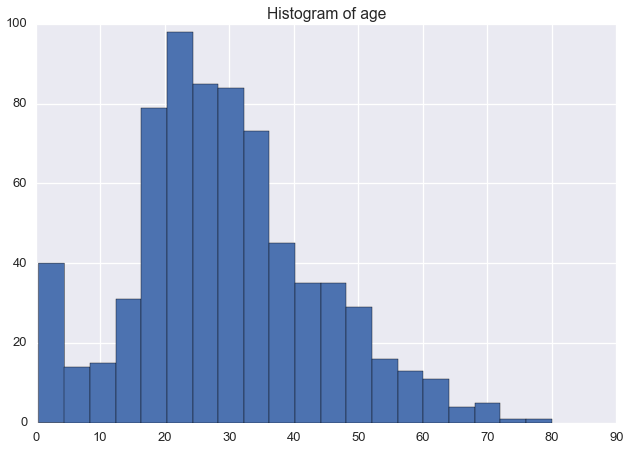

In [14]:
df['Age'].hist(bins=20)
plt.title('Histogram of age')

Seaborn really shines here, we can make very sophisticated plots using just a few lines

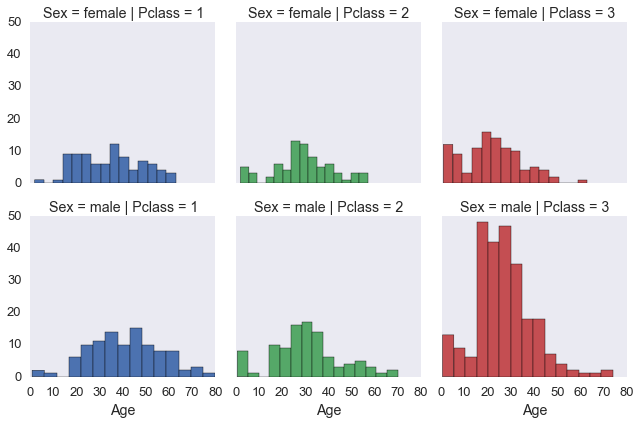

In [15]:
g = sns.FacetGrid(df, row="Sex", col="Pclass", hue="Pclass")
g.map(plt.hist, "Age", bins=15)

To compare the survival rates among different groups, it's best to use a table

In [16]:
print 'Number of people aboard based on gender and class:'
print df.groupby(['Sex', 'Pclass'])['Survived'].count()

print '\n% survivors based on gender and class:'
print df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Number of people aboard based on gender and class:
Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

% survivors based on gender and class:
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


### Most common surnames using a Counter

We can use a Counter from the standard *collections* module to quickly find the most common surnames. 
A Counter is a modified dictionary that makes counting very simple.

In [17]:
from collections import Counter

print Counter(df['Surname']).most_common(10)

[('Andersson', 9), ('Sage', 7), ('Goodwin', 6), ('Panula', 6), ('Johnson', 6), ('Carter', 6), ('Skoog', 6), ('Rice', 5), ('Harper', 4), ('Ford', 4)]


### Subsetting a dataframe

We can also subset the dataset based on a set of criteria in Pandas. 
In this example, we see that the Skoog family didn't survive the tragedy.

In [18]:
df[df['Surname'] == 'Skoog']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname
63,0,3,"Skoog, Master. Harald",male,4,3,2,27.9,NaN,S,Skoog
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45,1,4,27.9,NaN,S,Skoog
360,0,3,"Skoog, Mr. Wilhelm",male,40,1,4,27.9,NaN,S,Skoog
634,0,3,"Skoog, Miss. Mabel",female,9,3,2,27.9,NaN,S,Skoog
642,0,3,"Skoog, Miss. Margit Elizabeth",female,2,3,2,27.9,NaN,S,Skoog
819,0,3,"Skoog, Master. Karl Thorsten",male,10,3,2,27.9,NaN,S,Skoog


## Iris dataset

We can also directly read data from a url.
In this case, let's have a look at the famous Iris dataset created by R.A. Fisher.

In [19]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None,
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


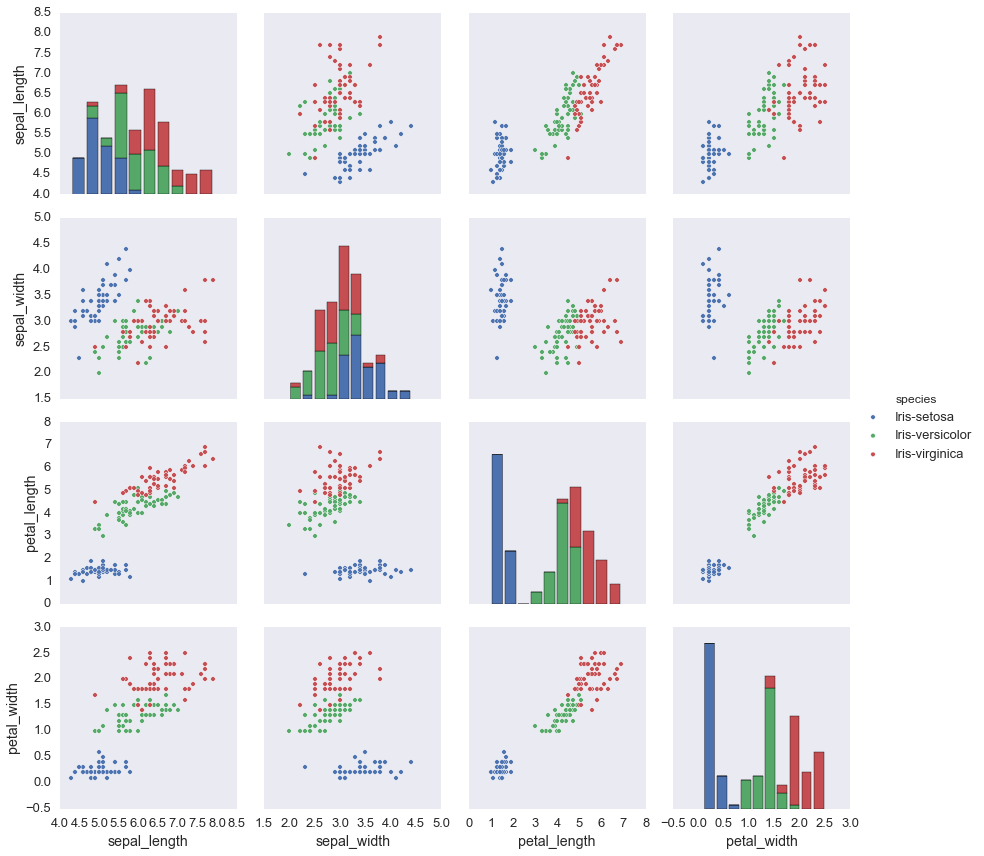

In [21]:
sns.pairplot(iris, hue='species')

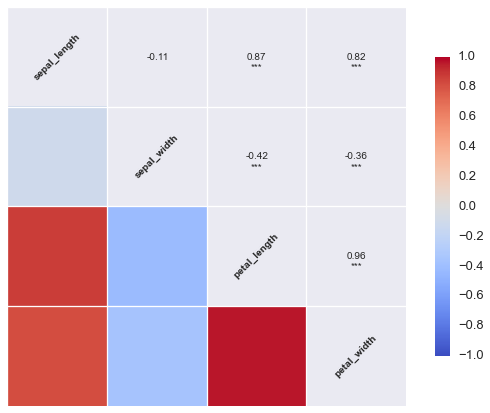

In [22]:
sns.corrplot(iris.drop('species', 1))